In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [3]:
df = pd.read_csv('car data.csv')

print(df.head())
print(df.columns)


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [ ]:
fuel_type = df['Fuel_Type']
tranmission = df['Transmission']
sellingPrice = df['Selling_Price']
owner = df['Seller_Type']

In [ ]:
# Column Visualization
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualzing categorical data columns')

plt.subplot(1,3,1)
plt.bar(fuel_type, sellingPrice, color= 'royalblue')
plt.xlabel('Fuel type')
plt.ylabel('Selling Price')

plt.subplot(1,3,2) 
plt.bar(owner, sellingPrice, color='red')
plt.xlabel('Seller Type')

plt.subplot(1,3,3)
plt.bar(tranmission, sellingPrice, color='purple')
plt.xlabel('Tranmission type')

plt.show()

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing Categorail Columns')
sns.barplot(x=fuel_type, y=sellingPrice, ax=axes[0])
sns.barplot(x=owner, y=sellingPrice, ax=axes[1])
sns.barplot(x=tranmission, y=sellingPrice, ax=axes[2])

In [ ]:
df = pd.get_dummies(df, columns=['Seller_Type', 'Transmission', 'Fuel_Type'], drop_first=True)
print(df.head())

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation between Columns")
plt.show()

In [ ]:
fig= plt.figure(figsize=(7,5))
plt.title('Correlation between present price and selling price')
sns.regplot(x='Present_Price', y='Selling_Price', data=df)

In [ ]:
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']

In [ ]:
print(f"The shape of X: {X.shape}")
print(f"The shape of y: {y.shape}")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
print(f"The shape of X_train: {X_train.shape}")
print(f"The shape of X_test: {X_test.shape}")
print(f"The shape of y_train: {y_train.shape}")
print(f"The shape of y_test: {y_test.shape}")

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

In [56]:
pred = model.predict(X_test)

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [60]:
print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2_Score: ", (metrics.r2_score(pred, y_test)))

MAE:  1.2698356709059242
MSE:  3.541748500948457
R2_Score:  0.8296744278342878


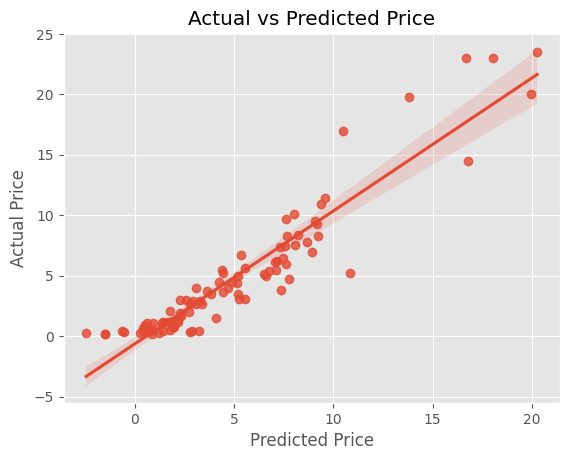

In [61]:
sns.regplot(x=pred, y=y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual vs Predicted Price')
plt.show()